In [37]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
%matplotlib inline

<br>mpg: Miles per gallon (fuel efficiency)<br>
cylinders: Number of cylinders in the engine<br>
displacement: Engine displacement (in cubic inches)<br>
horsepower: Engine horsepower<br>
weight: Vehicle weight (in pounds)<br>
acceleration: Time to accelerate from 0 to 60 mph (in seconds)<br>
model year: The year the car model was released<br>
origin: Country of origin (e.g., USA, Europe, Japan)<br>
name: Car name or model<br>
This dataset is commonly used for demonstrating regression analysis, data visualization, and other data science techniques.<br>

In [38]:
mpg_df = sns.load_dataset('mpg')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [39]:
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [40]:
mpg_df = mpg_df.dropna()
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


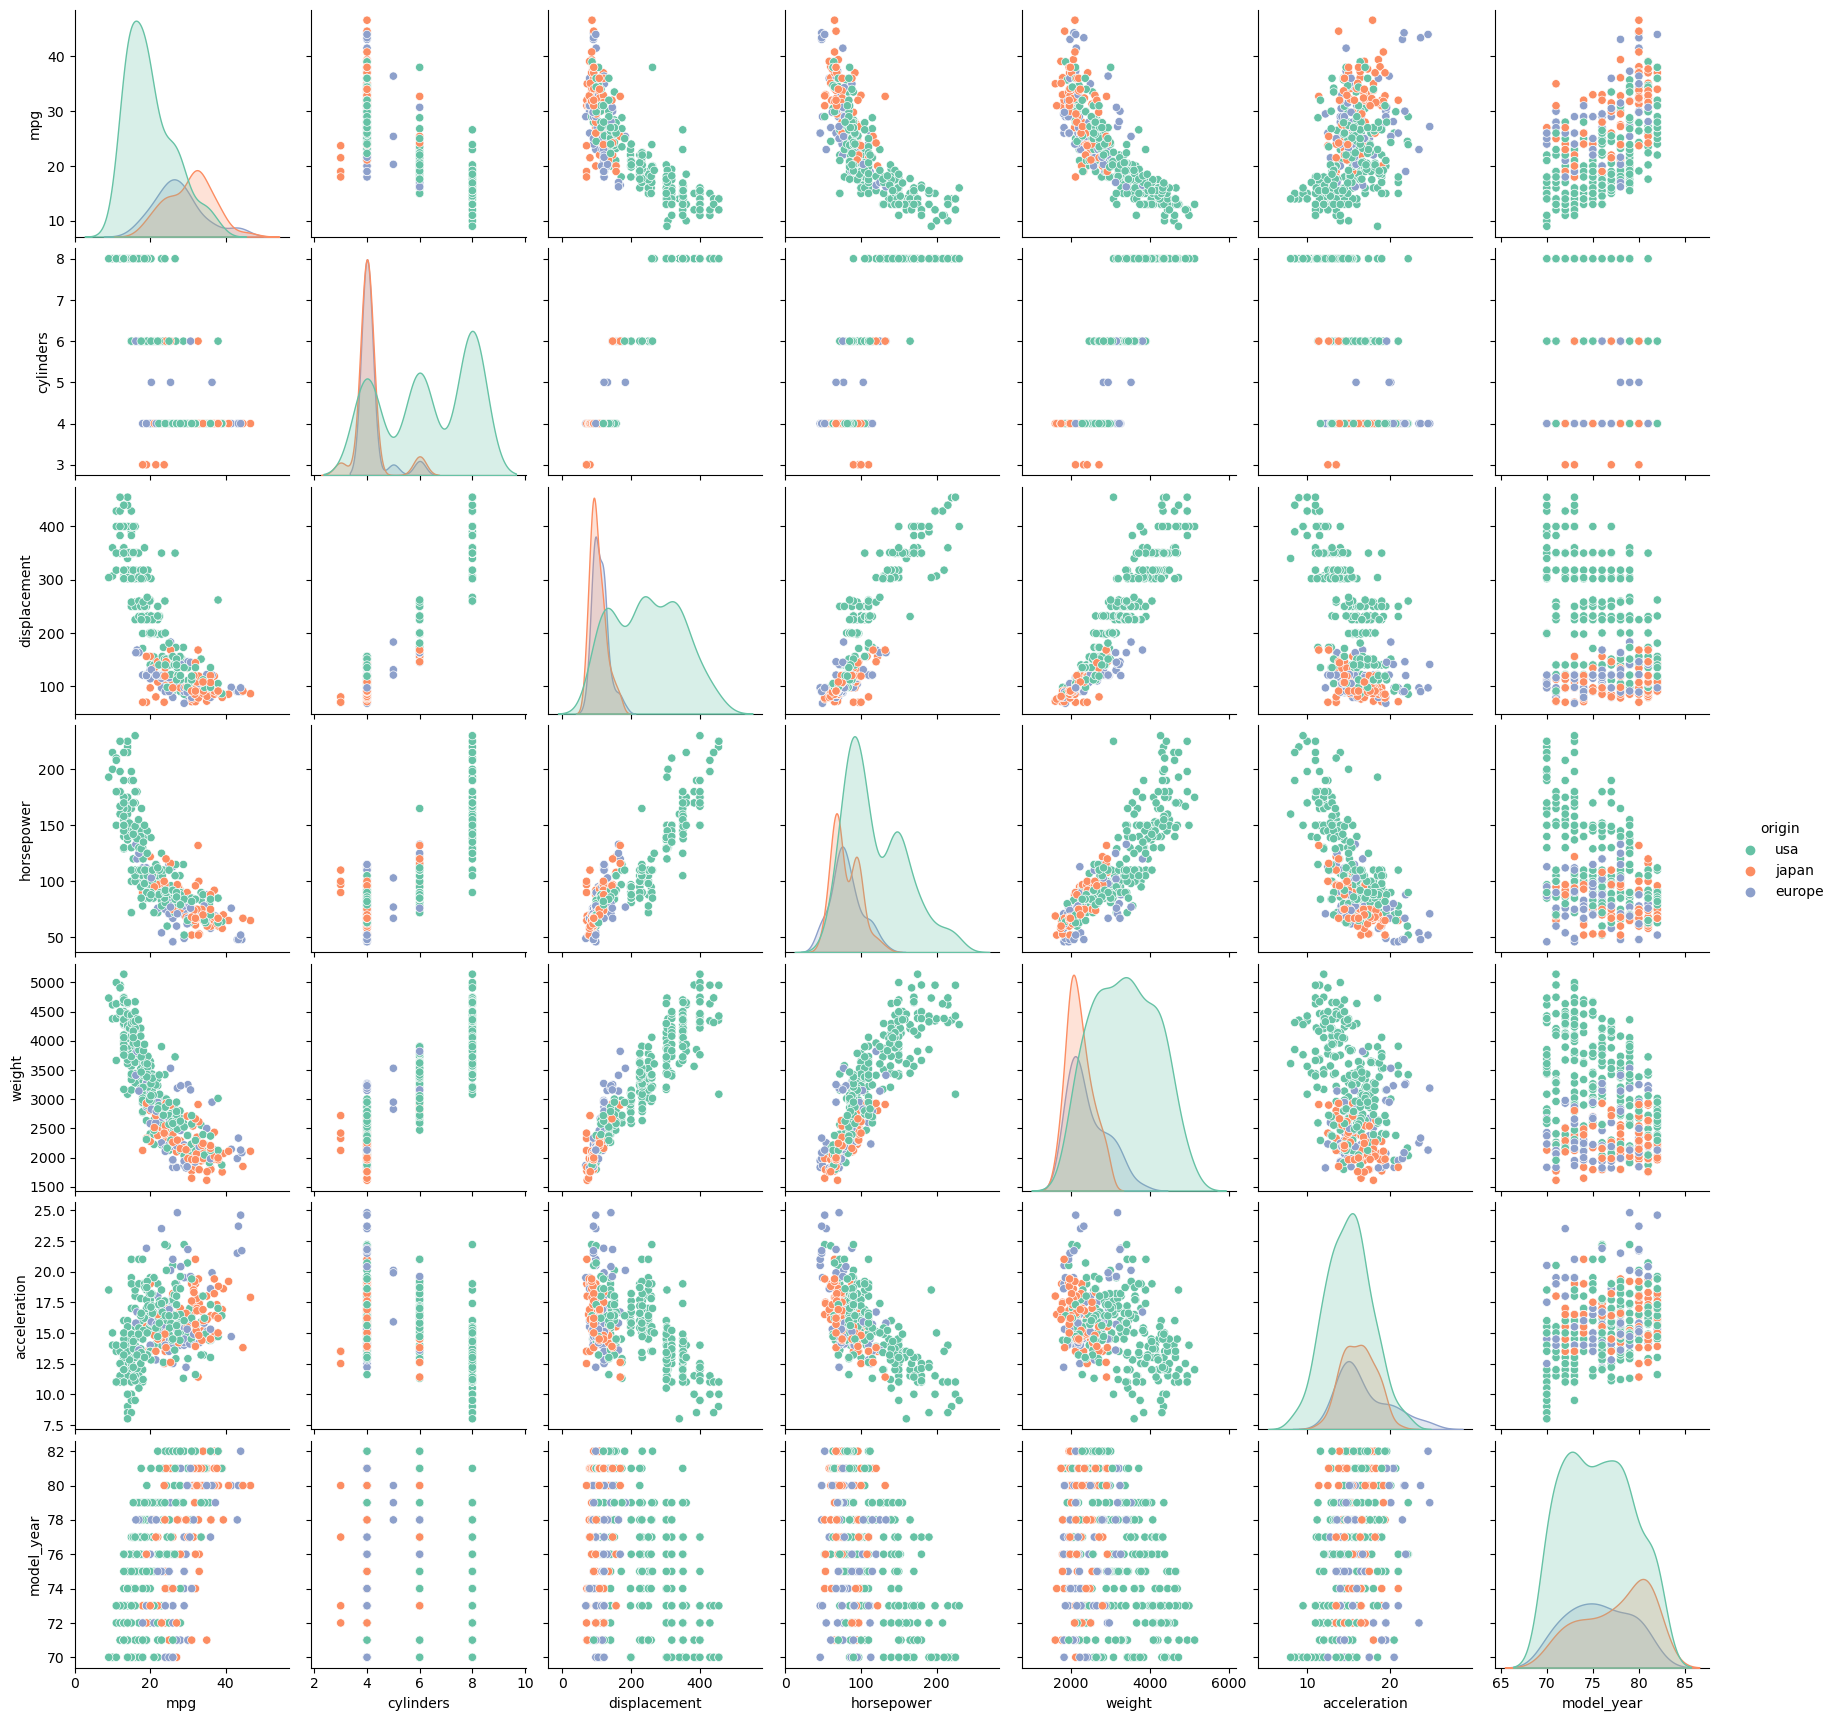

In [41]:
sns.pairplot(mpg_df,hue='origin')
plt.show()

In [42]:
df_mpg = mpg_df[['mpg','weight','horsepower']]
df_mpg.dropna()
df_mpg

,mpg,weight,horsepower
0,18.0,3504,130.0
1,15.0,3693,165.0
2,18.0,3436,150.0
3,16.0,3433,150.0
4,17.0,3449,140.0
...,...,...,...
393,27.0,2790,86.0
394,44.0,2130,52.0
395,32.0,2295,84.0
396,28.0,2625,79.0


In [47]:
df_mpg.describe()

,mpg,weight,horsepower
count,392.000000,392.000000,392.000000
mean,23.445918,2977.584184,104.469388
std,7.805007,849.402560,38.491160
min,9.000000,1613.000000,46.000000
25%,17.000000,2225.250000,75.000000
50%,22.750000,2803.500000,93.500000
75%,29.000000,3614.750000,126.000000
max,46.600000,5140.000000,230.000000


Text(0.5, 1.0, 'Mpg x HP')

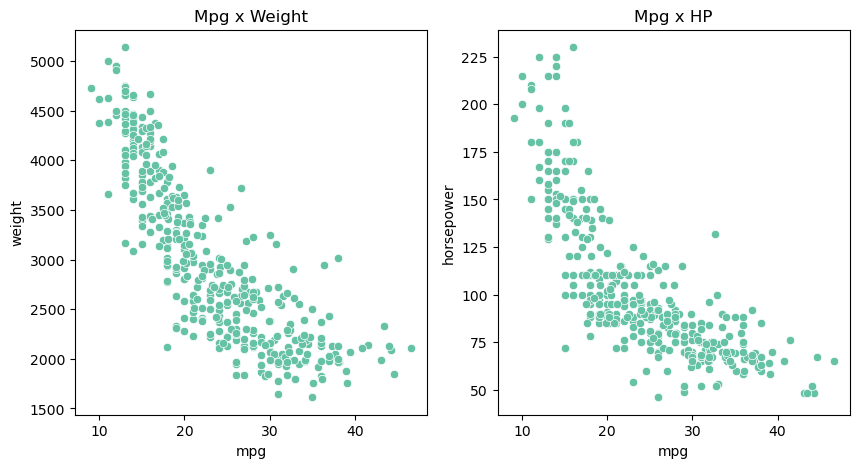

In [49]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
axes[0].set_title("Mpg x Weight")
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
axes[1].set_title("Mpg x HP")

In [52]:
df_mpg = df_mpg.groupby(['mpg'],as_index=False).mean()
df_mpg.head()

,mpg,weight,horsepower
0,9.0,4732.00,193.00
1,10.0,4495.50,207.50
2,11.0,4419.00,187.00
3,12.0,4786.50,185.00
4,13.0,4254.45,158.35


In [56]:
df_mpg.describe()

,mpg,weight,horsepower
count,127.000000,127.000000,127.000000
mean,27.322047,2739.352415,93.182258
std,8.352976,716.279404,31.924081
min,9.000000,1755.000000,48.000000
25%,20.550000,2137.000000,70.062500
50%,27.200000,2615.000000,85.000000
75%,33.600000,3170.000000,107.250000
max,46.600000,4786.500000,207.500000


# Volvemos a graficar

Text(0.5, 1.0, 'Mpg x HP')

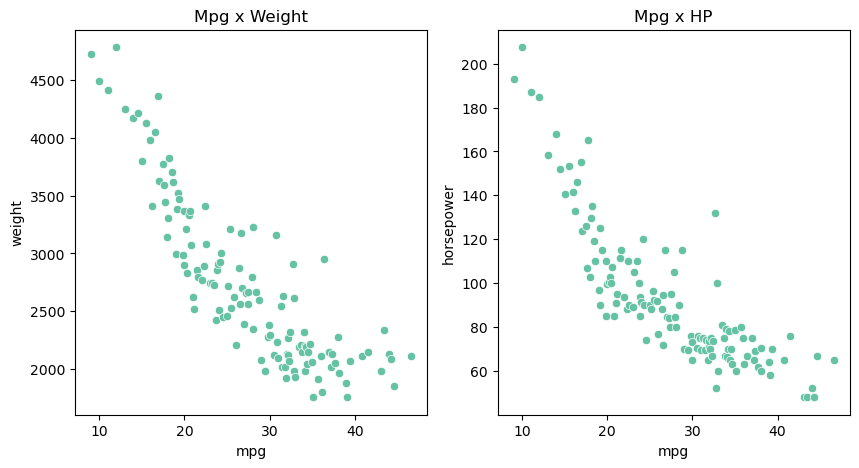

In [54]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
axes[0].set_title("Mpg x Weight")
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
axes[1].set_title("Mpg x HP")

# Empezamos con aproximacion lineal $Y = aX + b$

In [57]:
df_mpg_lineal = df_mpg # Hacemos copia para hacer el calculo para Y = aX + b
df_mpg_lineal = df_mpg_lineal.rename(columns={'mpg':'mpg=X','weight':'Y1(W)','horsepower':'Y2(HP)'})


In [58]:
df_mpg_lineal.loc[:,'X2'] = np.power(df_mpg_lineal['mpg=X'],2)
df_mpg_lineal.loc[:,'X*Y1(W)'] = df_mpg_lineal['mpg=X']*df_mpg_lineal['Y1(W)']
df_mpg_lineal.loc[:,'X*Y2(HP)'] = df_mpg_lineal['mpg=X']*df_mpg_lineal['Y2(HP)']
df_mpg_lineal.head()

,mpg=X,Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP)
0,9.0,4732.00,193.00,81.0,42588.00,1737.00
1,10.0,4495.50,207.50,100.0,44955.00,2075.00
2,11.0,4419.00,187.00,121.0,48609.00,2057.00
3,12.0,4786.50,185.00,144.0,57438.00,2220.00
4,13.0,4254.45,158.35,169.0,55307.85,2058.55


In [60]:
suma_parametros = df_mpg_lineal.sum()
suma_parametros

mpg=X       3.469900e+03
Y1(W)       3.478978e+05
Y2(HP)      1.183415e+04
X2          1.035961e+05
X*Y1(W)     8.854537e+06
X*Y2(HP)    2.951797e+05
dtype: float64

In [70]:
# Define the coefficients matrix A
A = np.array([[suma_parametros['X2'],suma_parametros['mpg=X']],
             [suma_parametros['mpg=X'],df_mpg_lineal.shape[0]]])

# Define the coefficients matrix B1, Weight
B1 = np.array([suma_parametros['X*Y1(W)'],
              suma_parametros['Y1(W)']])
solve1 = np.linalg.solve(A,B1) # Obtenemos a y b de Weight

# Define the coefficients matrix B1, Weight
B2 = np.array([suma_parametros['X*Y2(HP)'],
              suma_parametros['Y2(HP)']])
solve2 = np.linalg.solve(A,B2) # Obtenemos a y b de HorsePower


In [71]:
x1 = np.arange(df_mpg_lineal['mpg=X'].min(),df_mpg_lineal['mpg=X'].max()+1,1)
y1 = solve1[0]*x1 + solve1[1]

x2 = np.arange(df_mpg_lineal['mpg=X'].min(),df_mpg_lineal['mpg=X'].max()+1,1)
y2 = solve2[0]*x2 + solve2[1]

print(f"Aproximacion Lineal Weight: Y = {solve1[0]}X + {solve1[1]}")
print(f"Aproximacion Lineal Horse Power: Y = {solve2[0]}X + {solve2[1]}")

Aproximacion Lineal Weight: Y = -74.02118090178779X + 4761.7626162952465
Aproximacion Lineal Horse Power: Y = -3.202421036384521X + 180.67895698140177


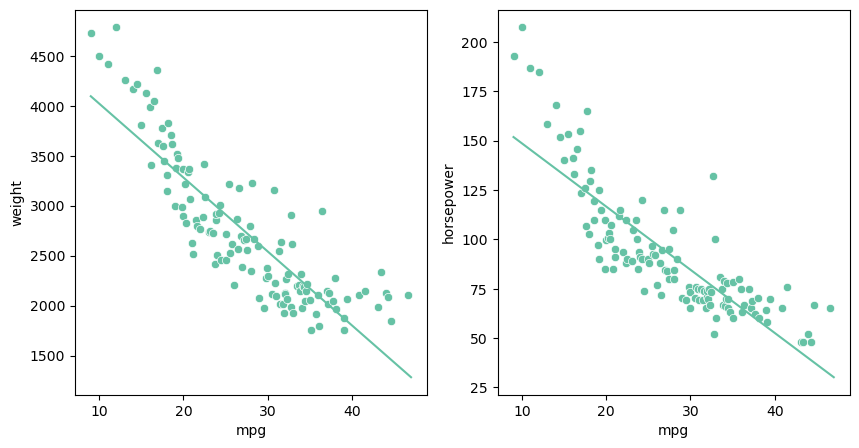

In [72]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
sns.lineplot(ax=axes[0],x=x1,y=y1)
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
sns.lineplot(ax=axes[1],x=x2,y=y2)
plt.show()


In [76]:
df_mpg_lineal.loc[:,'Y1_predict'] = solve1[0]*df_mpg_lineal['mpg=X'] + solve1[1]
df_mpg_lineal.loc[:,'Y2_predict'] = solve2[0]*df_mpg_lineal['mpg=X'] + solve2[1]
df_mpg_lineal.head()

,mpg=X,Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP),Y_predict,Y1_predict,Y2_predict
0,9.0,4732.00,193.00,81.0,42588.00,1737.00,4095.571988,4095.571988,151.857168
1,10.0,4495.50,207.50,100.0,44955.00,2075.00,4021.550807,4021.550807,148.654747
2,11.0,4419.00,187.00,121.0,48609.00,2057.00,3947.529626,3947.529626,145.452326
3,12.0,4786.50,185.00,144.0,57438.00,2220.00,3873.508445,3873.508445,142.249905
4,13.0,4254.45,158.35,169.0,55307.85,2058.55,3799.487265,3799.487265,139.047484


# Calculamos Error

In [77]:
weight_error = np.power(df_mpg_lineal['Y1_predict']-df_mpg_lineal['Y1(W)'],2).sum()
horsepower_error = np.power(df_mpg_lineal['Y2_predict']-df_mpg_lineal['Y2(HP)'],2).sum()
print(f"Weight linear error : {weight_error}")
print(f"Horse Power linear error : {horsepower_error}")

Weight linear error : 16476367.349808434
Horse Power linear error : 38253.35533392092


# Empezamos con aproximacion hiperbolica $ y = \frac{b}{x + a}$

In [111]:
df_mpg_hip = df_mpg # Hacemos copia para hacer aproximacion hiperbolica
df_mpg_hip = df_mpg_hip.rename(columns={'mpg':'mpg=X','weight':'y1(W)','horsepower':'y2(HP)'})
df_mpg_hip

,mpg=X,y1(W),y2(HP)
0,9.0,4732.00,193.00
1,10.0,4495.50,207.50
2,11.0,4419.00,187.00
3,12.0,4786.50,185.00
4,13.0,4254.45,158.35
...,...,...,...
122,43.4,2335.00,48.00
123,44.0,2130.00,52.00
124,44.3,2085.00,48.00
125,44.6,1850.00,67.00


# debo agregar resolucion de ecuacion hiperbolica

In [112]:
df_mpg_hip.loc[:,'Y1(W)'] = 1/df_mpg_hip['y1(W)']
df_mpg_hip.loc[:,'Y2(HP)'] = 1/df_mpg_hip['y2(HP)']
df_mpg_hip.loc[:,'X2'] = np.power(df_mpg_hip['mpg=X'],2)
df_mpg_hip.loc[:,'X*Y1(W)'] = df_mpg_hip['mpg=X'] * df_mpg_hip['Y1(W)']
df_mpg_hip.loc[:,'X*Y2(HP)'] = df_mpg_hip['mpg=X'] * df_mpg_hip['Y2(HP)']
df_mpg_hip.head()

,mpg=X,y1(W),y2(HP),Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP)
0,9.0,4732.00,193.00,0.000211,0.005181,81.0,0.001902,0.046632
1,10.0,4495.50,207.50,0.000222,0.004819,100.0,0.002224,0.048193
2,11.0,4419.00,187.00,0.000226,0.005348,121.0,0.002489,0.058824
3,12.0,4786.50,185.00,0.000209,0.005405,144.0,0.002507,0.064865
4,13.0,4254.45,158.35,0.000235,0.006315,169.0,0.003056,0.082097


In [113]:
suma_parametros_hip = df_mpg_hip.sum()
suma_parametros_hip

mpg=X         3469.900000
y1(W)       347897.756658
y2(HP)       11834.146782
Y1(W)            0.049241
Y2(HP)           1.499534
X2          103596.070000
X*Y1(W)          1.428220
X*Y2(HP)        44.132209
dtype: float64

In [120]:
# Define the coefficients matrix A
A = np.array([[suma_parametros_hip['X2'],suma_parametros_hip['mpg=X']],
             [suma_parametros_hip['mpg=X'],df_mpg_lineal.shape[0]]])

# Define the coefficients matrix B1, Weight
B1 = np.array([suma_parametros_hip['X*Y1(W)'],
              suma_parametros_hip['Y1(W)']])
solve1_hip = np.linalg.solve(A,B1) # Obtenemos a y b de Weight

# Define the coefficients matrix B1, Weight
B2 = np.array([suma_parametros_hip['X*Y2(HP)'],
              suma_parametros_hip['Y2(HP)']])
solve2_hip = np.linalg.solve(A,B2) # Obtenemos a y b de HorsePower

In [121]:
solve1_hip[0] = 1/solve1_hip[0]
solve1_hip[1] = solve1_hip[1]*solve1_hip[0]

solve2_hip[0] = 1/solve2_hip[0]
solve2_hip[1] = solve2_hip[1]*solve2_hip[0]

X1_hip = np.arange(df_mpg_hip['mpg=X'].min(),df_mpg_hip['mpg=X'].max()+1,1)
x1_hip = X1_hip
y1_hip = solve1_hip[0] / (x1_hip + solve1_hip[1])


X2_hip = np.arange(df_mpg_hip['mpg=X'].min(),df_mpg_hip['mpg=X'].max()+1,1)
Y2_hip = solve2_hip[0]*X2_hip + solve2_hip[1]
x2_hip = X2_hip
y2_hip = solve2_hip[0] / (x2_hip + solve2_hip[1])

print(f"Aproximacion Hiperbolica Weight: y = {solve1_hip[0]}/ (x + {solve1_hip[1]})")
print(f"Aproximacion Hiperbolica Horse Power: y = {solve2_hip[0]}/ (x + {solve2_hip[1]})")

Aproximacion Hiperbolica Weight: y = 106115.76572014605/ (x + 13.821880689043825)
Aproximacion Hiperbolica Horse Power: y = 2780.4052978495733/ (x + 5.5071784578036915)


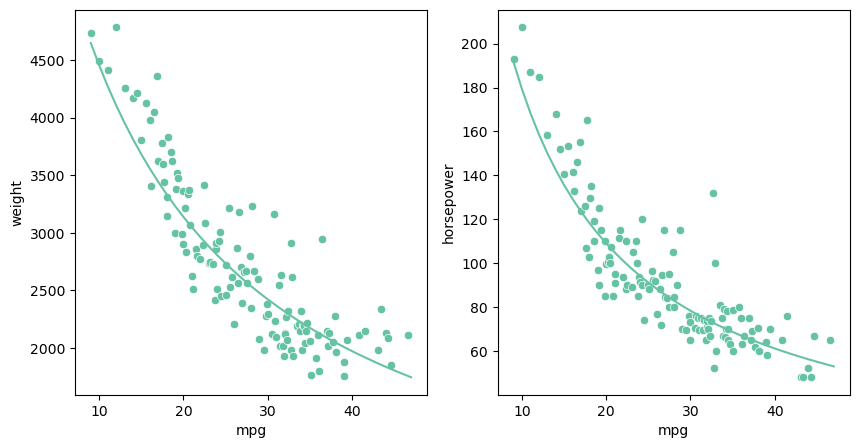

In [123]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
sns.lineplot(ax=axes[0],x=x1_hip,y=y1_hip)
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
sns.lineplot(ax=axes[1],x=x2_hip,y=y2_hip)
plt.show()

In [124]:
df_mpg_hip.loc[:,'y1_predict'] = solve1_hip[0] / (df_mpg_hip['mpg=X'] + solve1_hip[1])
df_mpg_hip.loc[:,'y2_predict'] = solve2_hip[0] / (df_mpg_hip['mpg=X'] + solve2_hip[1])
df_mpg_hip.head()

,mpg=X,y1(W),y2(HP),Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP),y1_predict,y2_predict
0,9.0,4732.00,193.00,0.000211,0.005181,81.0,0.001902,0.046632,4649.737993,191.657207
1,10.0,4495.50,207.50,0.000222,0.004819,100.0,0.002224,0.048193,4454.550298,179.297949
2,11.0,4419.00,187.00,0.000226,0.005348,121.0,0.002489,0.058824,4275.089670,168.436132
3,12.0,4786.50,185.00,0.000209,0.005405,144.0,0.002507,0.064865,4109.528930,158.815157
4,13.0,4254.45,158.35,0.000235,0.006315,169.0,0.003056,0.082097,3956.313390,150.233884


# Calculamos Error

In [126]:
weight_error = np.power(df_mpg_hip['y1_predict']-df_mpg_hip['y1(W)'],2).sum()
horsepower_error = np.power(df_mpg_hip['y2_predict']-df_mpg_hip['y2(HP)'],2).sum()
print(f"Weight linear error : {weight_error}")
print(f"Horse Power linear error : {horsepower_error}")

Weight linear error : 11335460.339243531
Horse Power linear error : 22867.951706016825


# Empezamos con aproximacion hiperbolica $ y = b*e^{(a+x)}$